# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




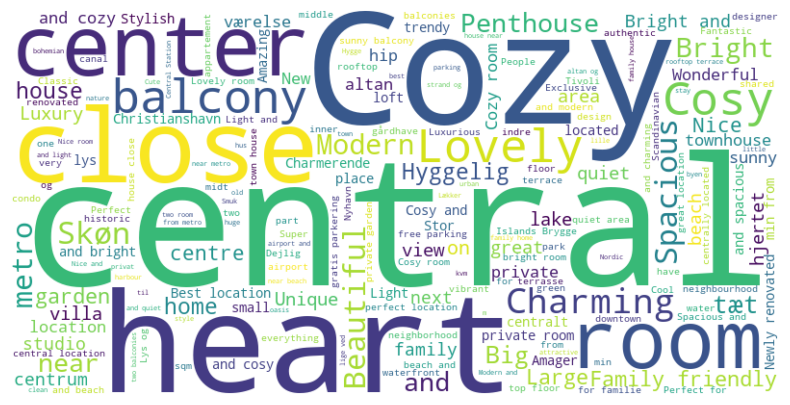

In [38]:
import pandas as pd
import sklearn as sk

data = pd.read_csv('listings.csv')
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

data_filtered = data_filtered.dropna()

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

data_filtered['price'] = data_filtered['price'].replace('[\\$,]', '', regex=True).astype(float)

median_price = data_filtered['price'].median()
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

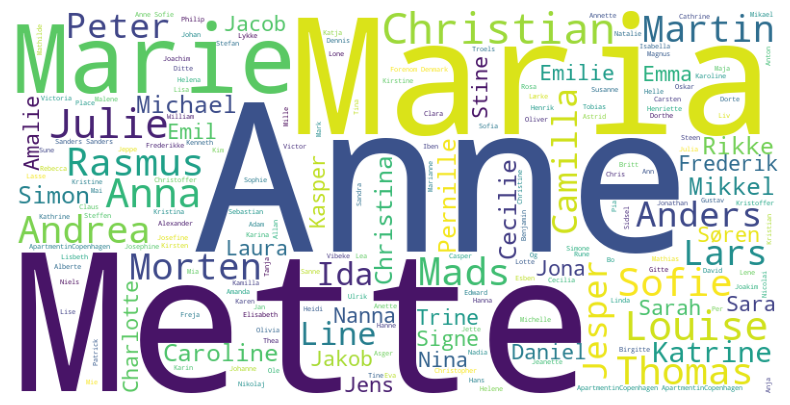

In [40]:
text = ' '.join(data_filtered['host_name'].astype(str))
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

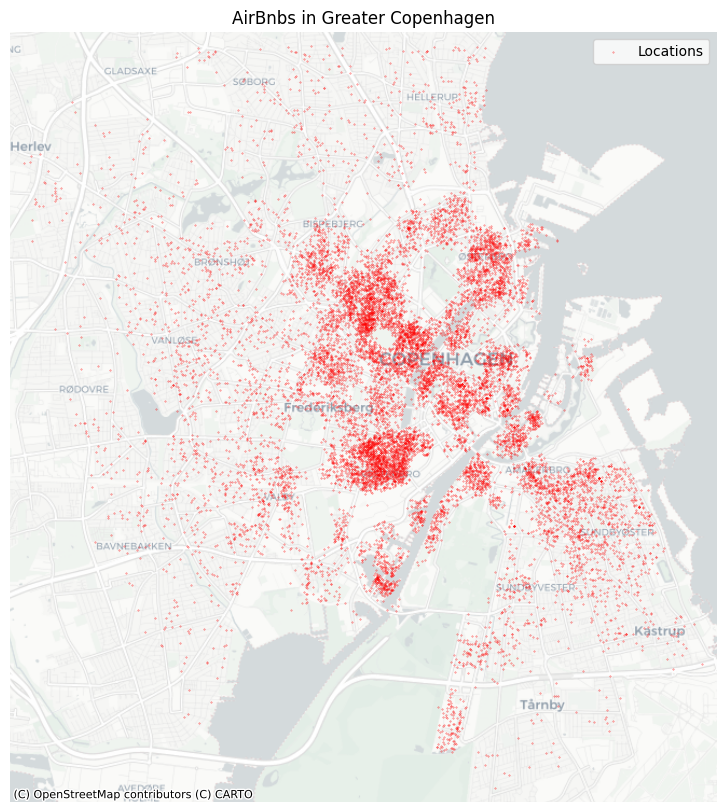

In [55]:
import geopandas as gpd
import contextily as ctx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

file_path = "listings.csv"
df = pd.read_csv(file_path)

df["geometry"] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
gdf_points = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")
municipalities = [
    "Copenhagen Municipality, Denmark",
]
gdfs = [ox.geocode_to_gdf(municipality) for municipality in municipalities]
gdf_map = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

gdf_map = gdf_map.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))

minx, miny, maxx, maxy = gdf_points.total_bounds
buffer = 500
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

gdf_map.plot(ax=ax, alpha=0)

gdf_points.plot(ax=ax, color="red", markersize=0.1, alpha=0.7, label="Locations")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
plt.legend()
plt.title("AirBnbs in Greater Copenhagen")
plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

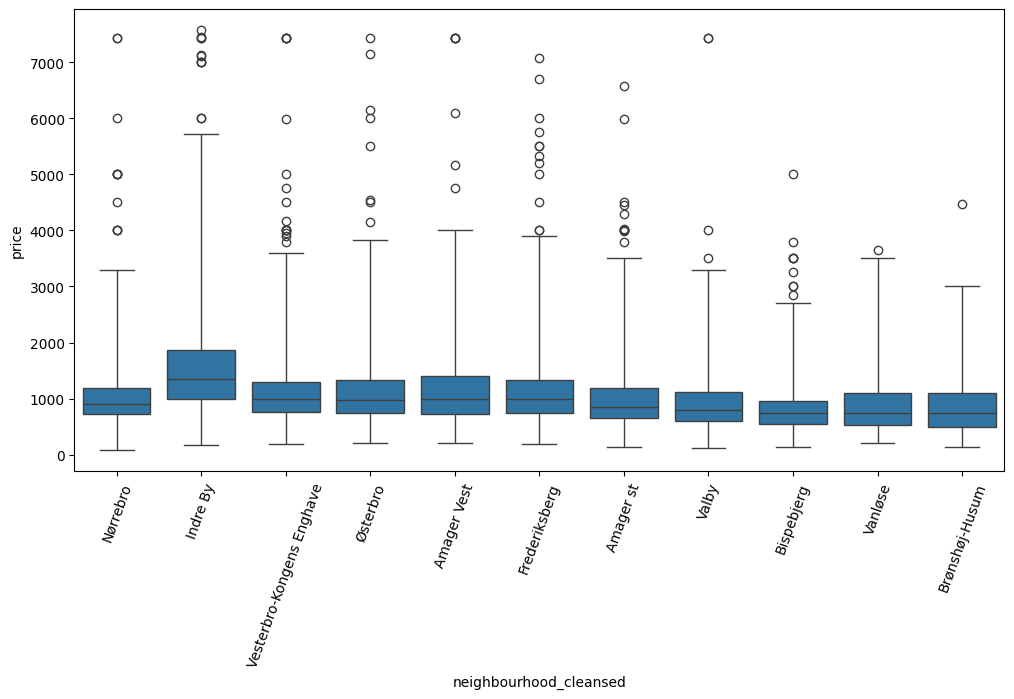

In [67]:
import numpy as np
import seaborn as sns

normalized_price = pd.DataFrame(data_filtered)
normalized_price = data_filtered[data_filtered["price"] < 8000]

plt.figure(figsize=(12, 6))
sns.boxplot(x="neighbourhood_cleansed", y="price", data=normalized_price, whis=4.5)
plt.xticks(rotation=70)
plt.show()

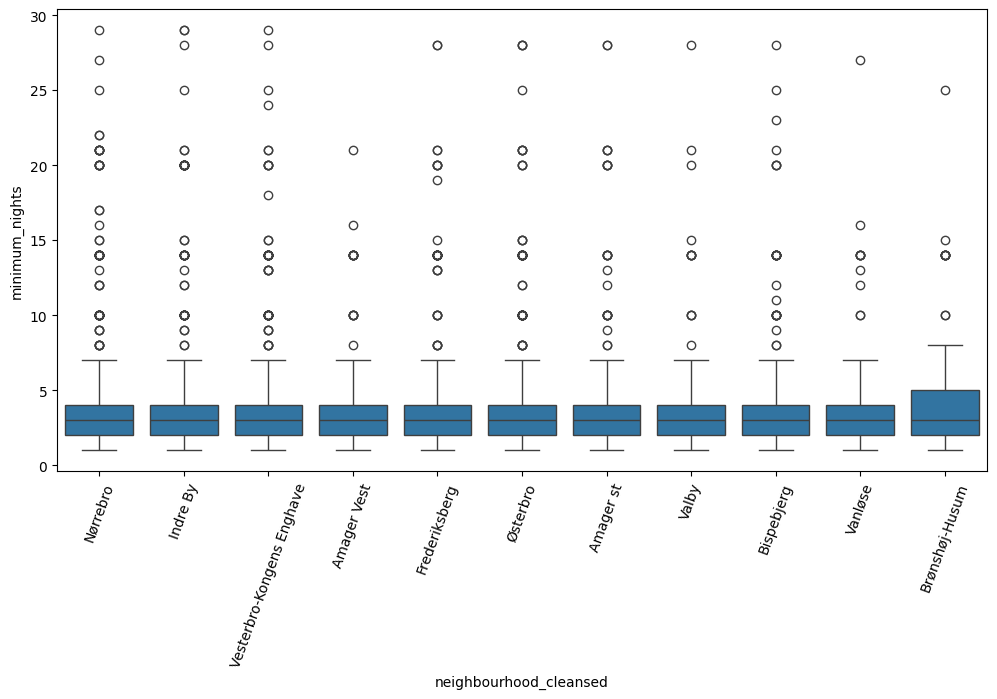

In [76]:
plt.figure(figsize=(12, 6))
normalized_nights = pd.DataFrame(data_filtered)
normalized_nights = data_filtered[data_filtered["minimum_nights"] < 30]
sns.boxplot(x="neighbourhood_cleansed", y="minimum_nights", data=normalized_nights)
plt.xticks(rotation=70)
plt.show()

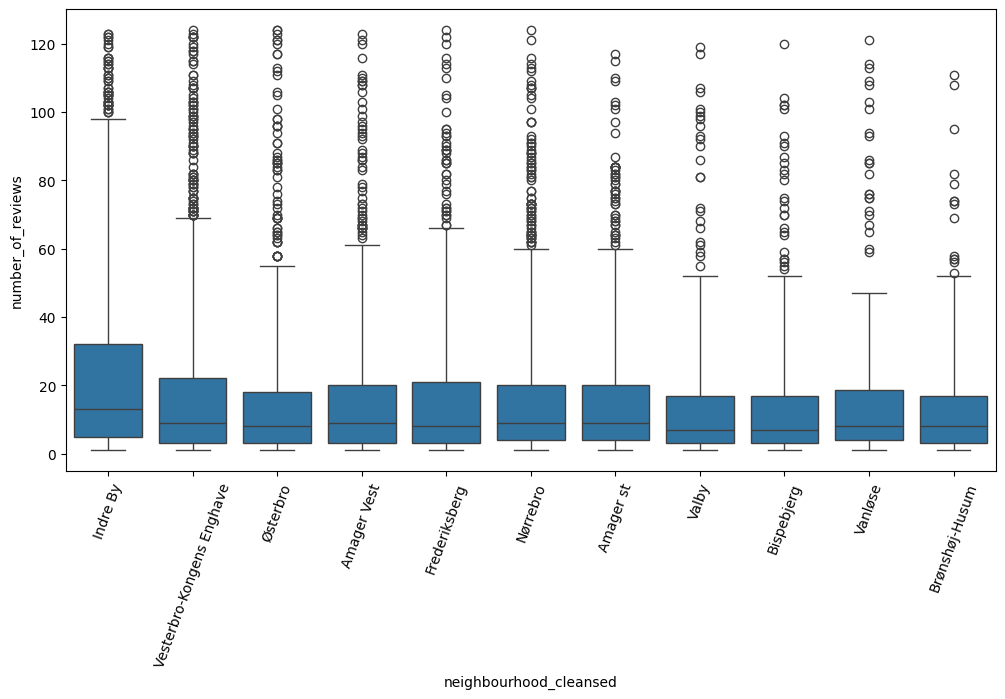

In [77]:
plt.figure(figsize=(12, 6))
normalized_number_of_reviews = pd.DataFrame(data_filtered)
normalized_number_of_reviews = data_filtered[data_filtered["number_of_reviews"] < 125]
sns.boxplot(x="neighbourhood_cleansed", y="number_of_reviews", data=normalized_number_of_reviews, whis=2.5)
plt.xticks(rotation=70)
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

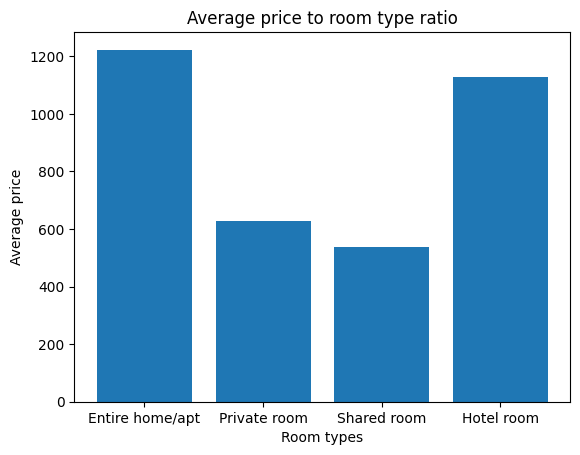

In [113]:
entire_home_apt_prices = data_filtered[data_filtered['room_type'] == 'Entire home/apt']
entire_home_apt_prices = entire_home_apt_prices['price']
private_room_prices = data_filtered[data_filtered['room_type'] == 'Private room']
private_room_prices = private_room_prices['price'] 

shared_room_prices = data_filtered[data_filtered['room_type'] == 'Shared room']
shared_room_prices = shared_room_prices['price']

hotel_room_prices = data_filtered[data_filtered['room_type'] == 'Hotel room']
hotel_room_prices = hotel_room_prices['price']

xaxis = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
yaxis = [entire_home_apt_prices.mean(), private_room_prices.mean(), shared_room_prices.mean(), hotel_room_prices.mean()]
plt.bar(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Average price')
plt.title('Average price to room type ratio')
plt.show()

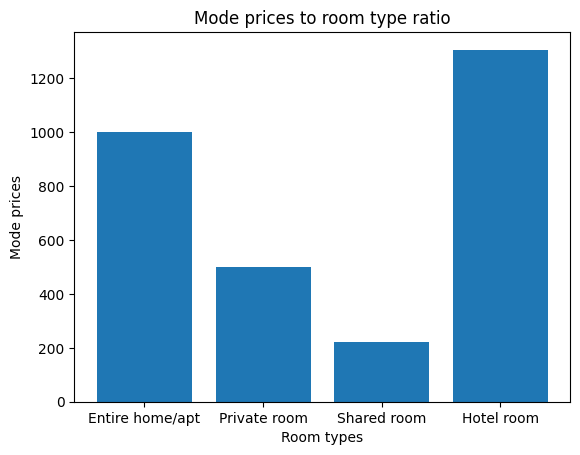

In [114]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.mode()[0], private_room_prices.mode()[0], shared_room_prices.mode()[0], hotel_room_prices.mode()[0]])

plt.bar(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Mode prices')
plt.title('Mode prices to room type ratio')
plt.show()

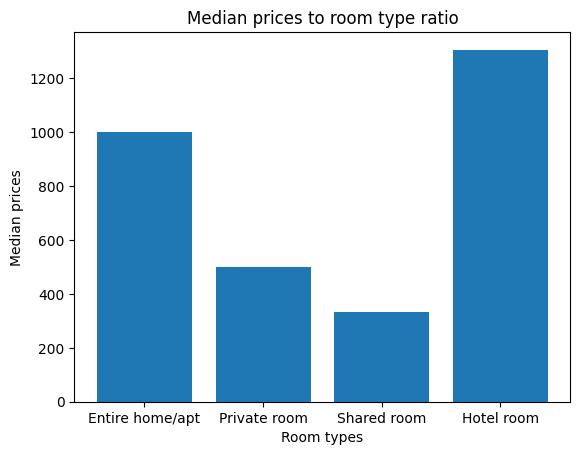

In [84]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.median(), private_room_prices.median(), shared_room_prices.median(), hotel_room_prices.median()])

plt.bar(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Median prices')
plt.title('Median prices to room type ratio')
plt.show()

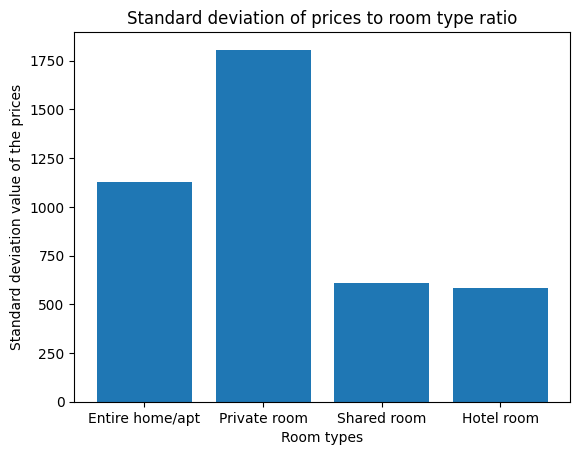

In [85]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.std(), private_room_prices.std(), shared_room_prices.std(), hotel_room_prices.std()])

plt.bar(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Standard deviation value of the prices')
plt.title('Standard deviation of prices to room type ratio')
plt.show()

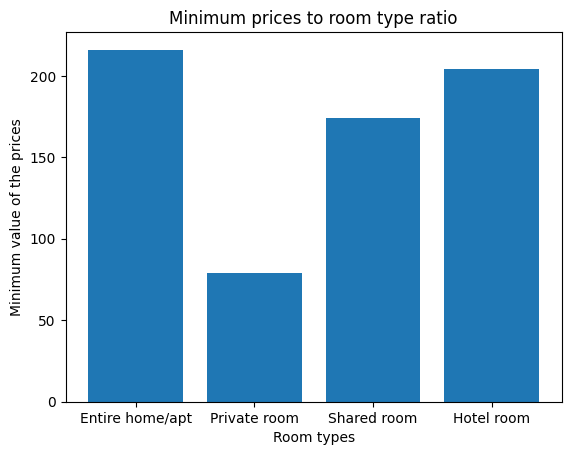

In [86]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.min(), private_room_prices.min(), shared_room_prices.min(), hotel_room_prices.min()])

plt.bar(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Minimum value of the prices')
plt.title('Minimum prices to room type ratio')
plt.show()

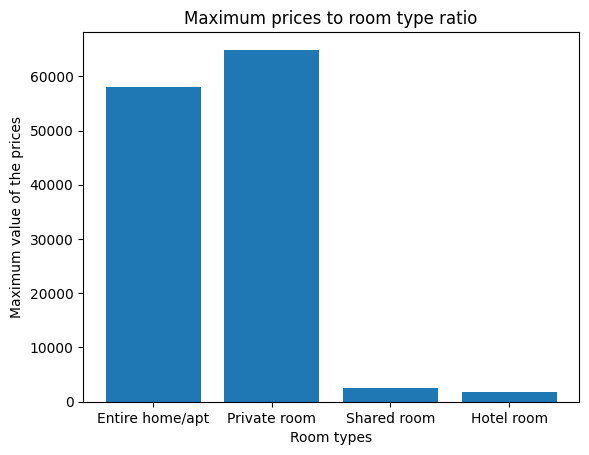

In [87]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.max(), private_room_prices.max(), shared_room_prices.max(), hotel_room_prices.max()])

plt.bar(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Maximum value of the prices')
plt.title('Maximum prices to room type ratio')
plt.show()

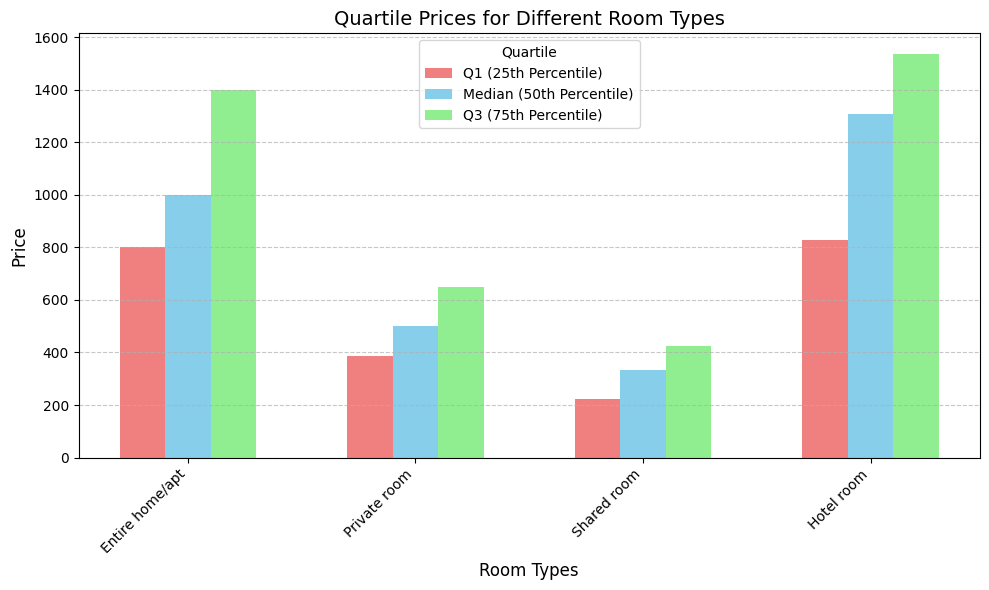

In [125]:
room_types = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

q1_values = {}
median_values = {}
q3_values = {}

for room_type in room_types:
    prices = data_filtered[data_filtered['room_type'] == room_type]['price']
    q1_values[room_type] = prices.quantile(0.25)
    median_values[room_type] = prices.quantile(0.50)
    q3_values[room_type] = prices.quantile(0.75)

q1_list = [q1_values[rt] for rt in room_types]
median_list = [median_values[rt] for rt in room_types]
q3_list = [q3_values[rt] for rt in room_types]

bar_width = 0.2
index = np.arange(len(room_types))
plt.figure(figsize=(10, 6))

bar1 = plt.bar(index - bar_width, q1_list, bar_width, label='Q1 (25th Percentile)', color='lightcoral')
bar2 = plt.bar(index, median_list, bar_width, label='Median (50th Percentile)', color='skyblue')
bar3 = plt.bar(index + bar_width, q3_list, bar_width, label='Q3 (75th Percentile)', color='lightgreen')

plt.xlabel('Room Types', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Quartile Prices for Different Room Types', fontsize=14)
plt.xticks(index, room_types, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Quartile', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

label_encoder_neighbourhood = LabelEncoder()
label_encoder_room_type = LabelEncoder()

knn_data = data_filtered[[
    "latitude",
    "longitude",
    "minimum_nights",
    "neighbourhood_cleansed",
    "room_type",
    "host_id",
    "id",
    "price",
    "number_of_reviews",  
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_location",
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",
]].copy()

knn_data.loc[:, 'neighbourhood_encoded'] = label_encoder_neighbourhood.fit_transform(knn_data['neighbourhood_cleansed'])
knn_data.loc[:, 'room_type_encoded'] = label_encoder_room_type.fit_transform(knn_data['room_type'])
knn_data = knn_data.drop(['neighbourhood_cleansed', 'room_type', 'price', # initial not encoded columns dropped and price dropped
                          
                           # 'neighbourhood_encoded', # worse when added
                           # 'room_type_encoded', #  best performing metric!
                           # "latitude", # better, seems like lat,long makes more difference than neighbourhood
                           # "longitude", # better
                            # "minimum_nights", # almost no difference
                            "host_id", # almost no difference
                            "id", # almost no difference
                            "number_of_reviews", # no difference for all reviews
                            "review_scores_rating"  ,
                            "review_scores_accuracy" , 
                            "review_scores_cleanliness"  ,
                            "review_scores_location",
                            "review_scores_checkin"  ,
                            # "review_scores_communication"  ,
                            "review_scores_value"  ,
                            "reviews_per_month"  ,
                            # "calculated_host_listings_count" , # no difference
                            # "availability_365", # marginally worse with it
                         ], axis=1)
knn_data = pd.concat([knn_data, data_filtered["price_category"]], axis=1)
X = knn_data.iloc[:, :-1]
Y = knn_data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=42, test_size=0.2
)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=100, p=1)
classifier.fit(X_train, Y_train)
prediction = classifier.predict(X_test)
print("Accuracy score with train data: {}".format(classifier.score(X_train, Y_train)))
print("Accuracy score with test data: {}".format(classifier.score(X_test, Y_test)))


Accuracy score with train data: 0.7022680412371134
Accuracy score with test data: 0.6999175597691674
